# Building and Using a FinDiscountCurve

Build a curve object directly from a vector of times and discount factors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:40 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



## Building the Discount Curve

Set the start date that anchors the curve

In [3]:
startDate = FinDate(1, 1, 2018)

Set a vector of times out to 10 years

In [4]:
times = np.linspace(0, 10.0, 5)

In [5]:
dates = startDate.addYears(times)

In [6]:
print(dates)

[MON 01 JAN 2018, WED 01 JUL 2020, SUN 01 JAN 2023, TUE 01 JUL 2025, SAT 01 JAN 2028]


Now generate the vector of discount factors at a continuous rate of 5%

In [7]:
rates = np.zeros(5)
rates[0] = 0.0475
rates[1] = 0.0500
rates[2] = 0.0525
rates[3] = 0.0550
rates[4] = 0.0575
dfs = np.exp(-rates * times)

We now construct the Discount Curve

In [8]:
curve = FinDiscountCurve(startDate,dates,dfs,FinInterpTypes.FLAT_FORWARDS)

Let's just check that we can refit the discount factors provided

In [9]:
print(curve)

FinDiscountCurve
DATES: DISCOUNT FACTORS
MON 01 JAN 2018:   1.00000000
WED 01 JUL 2020:   0.88249690
SUN 01 JAN 2023:   0.76912636
TUE 01 JUL 2025:   0.66199320
SAT 01 JAN 2028:   0.56270487



## Calculating Instantaneous Forward Rates

First look at monthly time steps

In [10]:
years = np.linspace(0,10,121)
dates = startDate.addYears(years)
fwds = curve.fwd(dates)

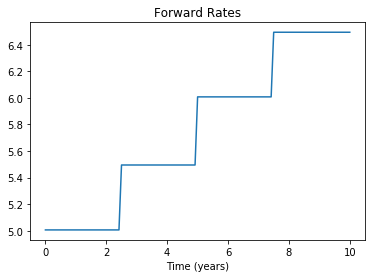

In [11]:
plt.title("Forward Rates")
plt.xlabel("Time (years)")
plt.plot(years, fwds*100);

We see that these are piecewise flat as the interpolation imposes.

## Money Market Forward Rates

In [12]:
years = np.linspace(0,10,121)
startDates = startDate.addYears(years)
tenor = "3M"
fwds = curve.fwdRate(dates, tenor)

In [13]:
type(fwds), type(years)

(numpy.ndarray, numpy.ndarray)

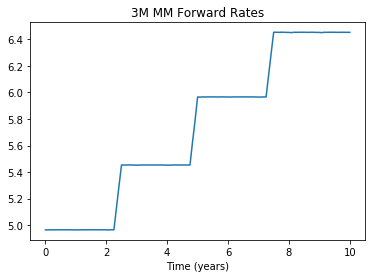

In [14]:
plt.title("3M MM Forward Rates")
plt.xlabel("Time (years)")
plt.plot(years, fwds*100);

## Calculating Instantaneous Par Rates

In [18]:
parRates = curve.parRate(dates)

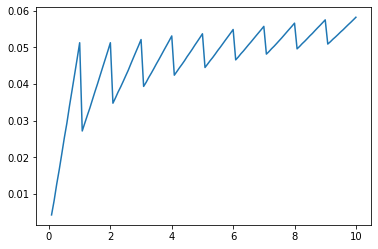

In [19]:
plt.plot(years, parRates)

In [25]:
swapRates = curve.swapRate(startDate.addDays(-1), dates)

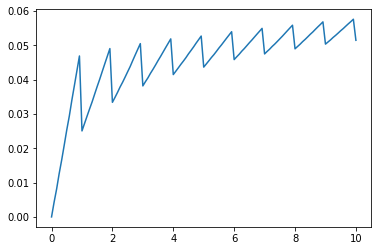

In [26]:
plt.plot(years, swapRates)

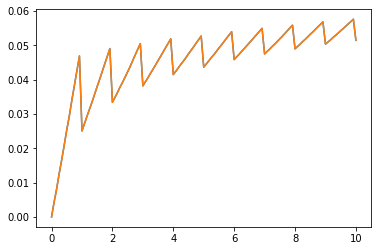

In [28]:
plt.plot(years, parRates)
plt.plot(years, swapRates)

Par rates and swap rates agree apart from day count factors.

Copyright (c) 2020 Dominic O'Kane